# 数据准备

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams  ## run command settings for plotting

config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

## 读取数据
path = r'C:\Users\SUNHONGYU\regress_data1.csv'#加r标志为字符串
import pandas as pd
data = pd.read_csv(path) ## data 是dataframe 的数据类型

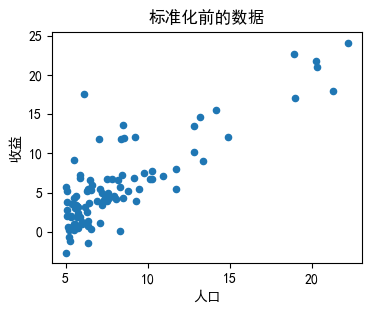

In [22]:
#看数据
data.plot(kind='scatter', x='人口', y='收益', figsize=(4,3)) # 利用散点图可视化数据
import matplotlib
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.title('标准化前的数据')
plt.show()

In [23]:
cols = data.shape[1]
X_data = data.iloc[:,:cols-1]#X是所有行，去掉最后一列
y_data = data.iloc[:,cols-1:]#X是所有行，最后一列

# 数据分割

In [24]:
#hold out
from sklearn.model_selection import train_test_split  
  
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# 数据标准化

In [25]:
min=X_train["人口"].min()
max=X_train["人口"].max()
X_train['人口']=(X_train["人口"]-min)/(max-min)
X_test['人口']=(X_test["人口"]-min)/(max-min)

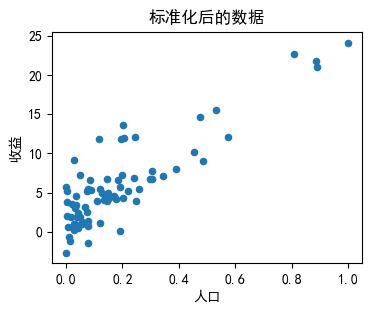

In [26]:
#看数据
t=X_train.copy()
t["收益"]=y_train
t.plot(kind='scatter', x='人口', y='收益', figsize=(4,3)) # 利用散点图可视化数据
import matplotlib
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.title('标准化后的数据')
plt.show()

In [27]:
#插入d
X_train.insert(0, 'Ones', 1)
X_test.insert(0, 'Ones', 1)

# loss函数

Ridege回归:$$ loss =\frac{(XW-Y)^T(XW-Y)}{2m}+\frac{λ}{2}||w||^2$$

In [28]:
def computeCost(X, Y, W):
    
    Y_hat = X@W
    lamda=0.0001#超参数
    
    #每个元素的平方的和
    w_squared=np.power(W,2)
    sum=np.sum(w_squared)
    
    L2=lamda/2*sum
    
    loss =np.sum((Y_hat - Y)** 2)/(2*X.shape[0])+L2# (m,n) @ (n, 1) -> (n, 1)
    return loss

# Batch Gradient Decent（批量梯度下降）

$${{w }_{j}}:={{w }_{j}}- \alpha \frac{1}{m}\sum\limits_{i=1}^m \frac{\partial }{\partial {{w}_{j}}}J\left( w \right):={{w }_{j}}- \frac{\alpha}{m} X_j^T(f(X)-Y)+\lambda\sum\limits_{i=1}^m{w}_{j}$$
$${{||w|| }_{2}}^2=\sum\limits_{i=1}^n{|{w }_{i}|}^2$$
$$\frac{\partial{{||w|| }_{2}}^2}{\partial{w }_{i}}=\lambda\sum\limits_{i=1}^m{w}_{j}$$

In [29]:
def gradientDescent(X, Y, W, alpha,lamda):
    num_train = X.shape[0]     
    Y_hat = np.dot(X,W)        
    dW = X.T@(Y_hat-Y)/ X.shape[0]+lamda*np.sum(W)
#     dW = X.T@(Y_hat-Y)
    W += -alpha * dW
    return W

# 最小二乘法

In [30]:
def LSQ(X,Y,w,b):
    w = (np.sum(Y * (X[:, 1:2] - X[:, 1:2].mean()))/(np.sum(X[:, 1:2]**2) - (np.sum(X[:, 1:2]))**2 / X.shape[0]))
    b = np.sum(Y - w * X[:, 1:2]) / X.shape[0]
    return w,b

# ridge回归

In [31]:
def RidgeRegression(X,Y, alpha, iters,lamda):
    loss_his = []
    W_his = []
    # step1: initialize the model parameters
    feature_dim = X.shape[1]
    W=np.zeros((feature_dim,1)) ## 初始化W系数矩阵，w 是一个(feature_dim,1)矩阵
    ## repeat step 2 and step 3 untill to the convergence or the end of iterations
    for i in range (iters):
        # step2 : using the initilized parameters to predict the output and calculate the loss   
        loss = computeCost(X,Y,W)
        loss_his.append(loss)
        # step3: using the gradient decent method to update the parameters 
        W = gradientDescent(X, Y, W, alpha,lamda)
        t=W.copy()
        W_his.append(t)
        #W_his.append(W)是浅拷贝 将W的地址赋值给his 所以随着W改变，W_his之前的赋值也会被改变
    return loss_his, W_his## 返回损失和模型参数。
    

In [32]:
def predict(X, W):
    '''
    输入：
        X：测试数据集
        W：模型训练好的参数
    输出：
        y_pre：预测值
    '''
    y_pre = np.dot(X,W)
    return y_pre

# 训练

In [33]:
alpha = 0.01
iters = 10000
lamda = 0.01
#代价函数是应该是numpy数组，所以我们需要从dataframeX_data和Y_data中读取数据，然后才能使用它们。 此外，我们还需要初始化w。
X=X_train.values
Y=y_train.values
loss_his_train, W_his= RidgeRegression(X,Y, alpha, iters,lamda)

In [34]:
#最小二乘法
X=X_train.values
Y=y_train.values
WLSQ=0
b=0
WLSQ,b=LSQ(X,Y,WLSQ,b)

# 预测

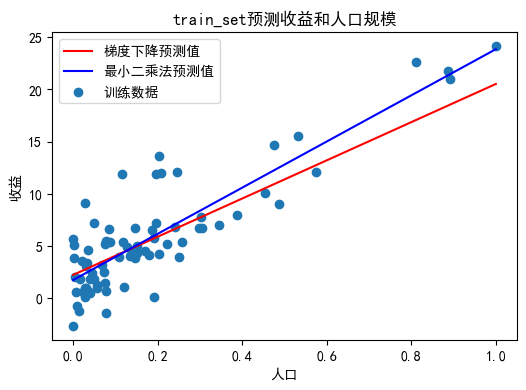

In [41]:
#train_set
x = np.linspace(X_train['人口'].min(), X_train['人口'].max(), 100)
f = W_his[-1][0, 0]  + (W_his[-1][1, 0]* x)#取最后的W
f_LSQ = b + WLSQ*x

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='梯度下降预测值')
ax.plot(x, f_LSQ, 'b', label='最小二乘法预测值')
ax.scatter(X_train['人口'], y_train['收益'], label='训练数据')

ax.legend(loc=2)
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90)
ax.set_title('train_set预测收益和人口规模')
plt.show()

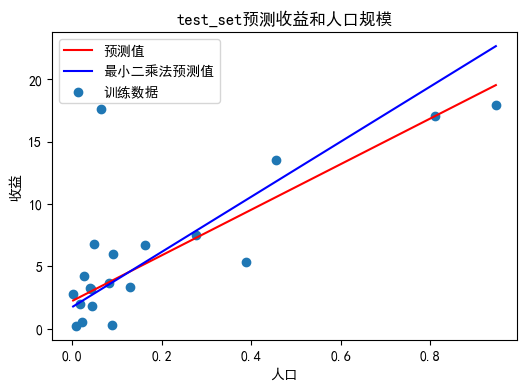

In [40]:
#利用train data 拟合出的model 预测test
x = np.linspace(X_test['人口'].min(), X_test['人口'].max(), 100)
f = W_his[-1][0, 0]  + (W_his[-1][1, 0]* x)#取最后的W
f_LSQ = b + WLSQ*x

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')
ax.plot(x, f_LSQ, 'b', label='最小二乘法预测值')
ax.scatter(X_test['人口'], y_test['收益'], label='训练数据')

ax.legend(loc=2)
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90)
ax.set_title('test_set预测收益和人口规模')
plt.show()

# loss变化比较

In [37]:
#利用train_set迭代的W算出在test_set的loss
loss_his_test=[]
X=X_test.values
Y=y_test.values
for i in range (iters):
    loss = computeCost(X,Y,W_his[i])
    loss_his_test.append(loss)

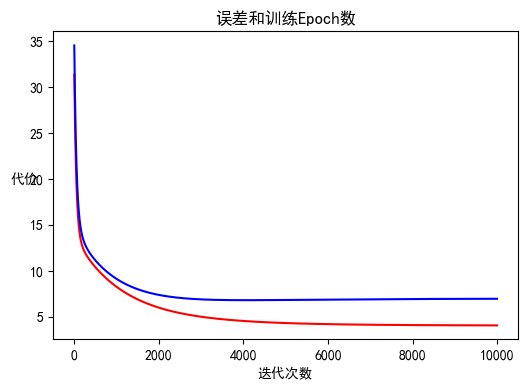

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iters), loss_his_train, 'r')
ax.plot(np.arange(iters), loss_his_test, 'b')
ax.set_xlabel('迭代次数')
ax.set_ylabel('代价', rotation=0)
ax.set_title('误差和训练Epoch数')
plt.show()